# Simulation et hasard

Nous sommes en présence de vieux stock de grains de blé à semer et nous cherchons à étudier le pouvoir germinatif des grains qu’il contient. C’est-à-dire le pourcentage des grains qui vont germer lorsqu’ils seront plantés. 

Prenons $x$ grains de blé et posons-les sur du papier filtre dans une boîte de Petri. Mouillons le papier filtre et gardons le tout à la lumière et à bonne température (24 °C). Au bout de 2 jours, le grain devrait germer. Si au bout de 5 jours, le grain ne germe pas, on considère qu’il ne germera jamais. S’il germe mal (pas de racine ou pas de feuille), on considère qu’il ne germe pas.

Le problème est de savoir comment conclure à partir du résultat de cette expérience. En effet, il y a une part de hasard lors de la prise des grains et il y aura une fluctuation des résultats selon l’échantillon choisi.

Établissons un plan d’attaque du problème.

- Regardons, tout d’abord, comment faire à partir d’un stock connu dont le pouvoir germinatif est de 50 %.
- Puis, étudions ce qui se passe à partir d’un stock connu dont le pouvoir germinatif n’est pas de 50 %, par exemple 75 %.
- Enfin, étudions ce qui arrive avec un échantillon de graines suffisamment grand.


# Première Partie : Le pouvoir germinatif est connu et vaut 50 %

## Exercice 1

Prenons un échantillon de 2 grains pour commencer.

Soit $G$ l’événement : « le grain germe » et $\overline{G}$ l’événement « le grain ne germe pas ». 

1. à partir de l’arbre des possibles ci-contre, compléter le tableau ci-dessous.
<IMG SRC="simul1.png">
2. Avec quelle probabilité (fréquence) notre échantillon nous donne le bon pouvoir germinatif ?
3. Les autres résultats possibles dans notre échantillon sont-il acceptables ?
4.	Établir l’arbre des possibles avec un échantillon de 3 grains et compléter le tableau ci-dessous
<IMG SRC="simul2.png">
5.	A-t-on une chance d’obtenir le pouvoir germinatif du sac avec 3 grains ?


Nous constatons qu’il faut donc prendre davantage de grains dans notre échantillon, mais aussi qu’il semble bien long de le faire à la main.
Nous allons étudier cette situation en simulant la germination des grains à l’aide de Python.

## Exercice 2 : Première simulation

On utilisera les bibliothèques math, numpy, matplotlib.pyplot et pylab pour avoir les fonctions de statistiques et de représentations graphiques.


In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pylab

La fonction `np.random.choice` permet de choisir au hasard un élément de la liste donnée avec équiprobabilité. On aurait pu utiliser d’autres fonctions mais celle-ci a d’autres qualités que nous allons découvrir.

Essayer les commandes suivantes plusieurs fois et constater que le choix se fait de manière aléatoire en essayant de prédire le résultat.


In [2]:
germe = np.random.choice(["non","oui"])
print(germe)

oui


Nous avons donc le moyen de simuler si un grain germe ou non.

Voyons maintenant comment simuler la germination de 10 grains.
Pour cela il faut simplement taper :


In [3]:
germe = np.random.choice(["non","oui"],10)
print(germe)

['oui' 'oui' 'non' 'oui' 'oui' 'oui' 'oui' 'non' 'oui' 'non']


Essayer les commandes ci-dessus plusieurs fois pour continuer de constater le côté aléatoire.

Nous souhaitons compter le nombre de « oui » dans chaque échantillon (on peut écrire un programme mais on souhaite aller plus vite). Nous allons donc ruser et changer le codage de l’état du grain.

Comme notre intérêt est d’avoir des grains qui germent, nous codons alors le grain qui germe avec le nombre 1 et le grain qui ne germe pas avec le nombre 0. La raison d’un tel codage est simple, pour compter le nombre de grains qui germent, il suffit d’ajouter tous ces nombres.

Essayer les commandes suivantes plusieurs fois pour constater l’efficacité de ce codage.


In [4]:
germe = np.random.choice([0,1],10)
print(germe)
print(sum(germe))

[1 1 1 0 1 0 0 1 1 1]
7


Nous allons maintenant simuler la prise d’un échantillon de 3 grains pour tester le pouvoir germinatif.

En utilisant la commande `str(numpy.random.choice([0,1],3))`, nous pouvons simuler cette expérience et l’écrire dans une chaîne de caractères.

Écrire un programme permettant de faire 1000 simulations et enregistrons-les toutes dans une liste nommées expériences. Afficher la liste en fin de programme.

In [5]:
expériences = [ ]
for compteur in range(1000):
    expériences.append(str(np.random.choice([0,1],3)))
print(expériences)

['[0 1 1]', '[1 1 0]', '[0 0 1]', '[0 0 1]', '[0 0 1]', '[0 1 0]', '[1 1 0]', '[1 0 0]', '[1 0 1]', '[1 0 1]', '[1 0 1]', '[0 0 1]', '[1 1 0]', '[1 0 1]', '[1 1 0]', '[0 1 0]', '[1 1 0]', '[0 1 0]', '[0 1 1]', '[1 0 0]', '[0 1 0]', '[0 1 1]', '[1 0 1]', '[0 0 1]', '[1 1 1]', '[0 0 0]', '[1 0 0]', '[1 0 1]', '[0 0 1]', '[1 0 1]', '[1 1 0]', '[0 1 1]', '[1 1 0]', '[1 0 1]', '[1 0 1]', '[0 1 0]', '[1 1 1]', '[0 1 1]', '[1 1 0]', '[1 0 1]', '[0 0 1]', '[0 0 0]', '[0 0 0]', '[1 1 0]', '[1 1 0]', '[1 0 0]', '[1 1 1]', '[0 1 0]', '[0 0 1]', '[0 1 0]', '[1 0 0]', '[1 0 1]', '[1 1 1]', '[0 1 0]', '[0 1 1]', '[1 1 1]', '[0 1 0]', '[0 0 0]', '[0 1 0]', '[0 0 1]', '[1 0 0]', '[1 1 0]', '[0 1 0]', '[1 1 1]', '[0 1 0]', '[1 0 1]', '[1 1 1]', '[1 0 1]', '[1 1 1]', '[1 1 1]', '[1 0 0]', '[0 1 0]', '[1 0 1]', '[0 1 0]', '[0 1 1]', '[0 1 1]', '[0 1 0]', '[0 0 0]', '[1 0 1]', '[1 0 0]', '[0 1 0]', '[0 0 0]', '[0 1 0]', '[0 0 1]', '[1 1 0]', '[0 0 0]', '[0 1 1]', '[1 0 1]', '[0 0 1]', '[1 1 1]', '[1 0 1]'

Nous voyons alors tous les chemins que peuvent prendre les expériences en suivant les branches de l’arbre des possibles que nous avons fait dans l’exercice 1.

Y a-t-il des branches plus représentées que d’autres ?

Pour répondre à cette question, nous allons représenter la répartition des différentes possibilités à l’aide de la fonction suivante.

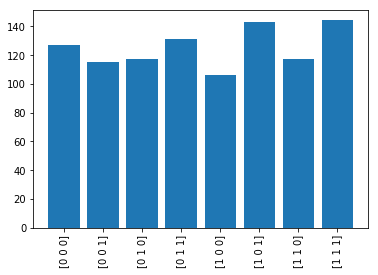

In [6]:
def Graphique(Donnees):
    import matplotlib.pyplot as plt
    import numpy as np
    import pylab
    Valeurs=list(sorted(set(expériences))) # set enlève les doublons
    Effectifs=[expériences.count(i) for i in Valeurs]
    plt.bar(Valeurs, Effectifs)
    pylab.xticks(rotation=90)
    plt.show()
Graphique(expériences)

En faisant fonctionner plusieurs fois le programme, que peut-on conjecturer ?

Il y a une fluctuation dans les répartitions mais les différentes possibilités sont sensiblement équivalentes. On peut le constater en augmentant le nombre de simulations. 

Les 8 branches (de la racine à la feuille) sont également représentées.

Mais dans le monde réel, les grains n’ont pas autant de chance de germer que de ne pas germer. Nous souhaitons que le plus grand nombre de grains possible germe. 

# Deuxième Partie : Le pouvoir germinatif est connu et vaut 75 %
Vers la loi binomiale
## Exercice 3
Supposons que dans le sac de grains de blé, 75% puissent germer.

1.	Quelle est dans ce cas la probabilité que le grain ne germe pas ?
2.	Simulons alors l’expérience en imposant les probabilités pour les deux cas avec l’option `p=[0.25,0.75]` dans la fonction `np.random.choice`.

Faire fonctionner le programme suivant et interpréter le graphique obtenu.


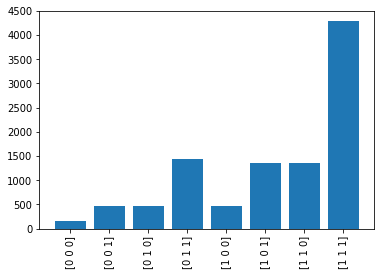

In [7]:
expériences = [ ]
for compteur in range(10000):
    expériences.append(str(np.random.choice([0,1],3,p=[0.25,0.75])))
Graphique(expériences)

Interprétation à l’aide du graphique et de l’arbre pondéré.

Quel est le cas le plus fréquent ? Quel est le cas le moins fréquent ? Peut-on l’expliquer à l’aide des fréquences ou probabilités sur les branches de l’arbre ci-dessous ?

<IMG SRC="simul3.png">

On peut expliquer l’arbre en utilisant les connaissances des élèves sur les proportions de proportions (voir automatismes). Par exemple, pour la deuxième branche, $GG\overline{G}$, en la lisant de droite à gauche, nous pouvons dire que 25 % des échantillons qui ont vu leurs deux premiers grains germer n’ont pas vu leur dernier grain germer. C’est-à-dire que 25 % des 75 % des échantillons qui ont vu leur premier grain germer ont vu le second germer mais pas le troisième. Et finalement que 25 % des 75 % des 75 % des échantillons ont vu leurs deux premiers grains germer mais pas le troisième.

4.	Y a-t-il des cas de même fréquence ? Que peut-on remarquer sur les branches correspondantes ?
5.	Comment peut-on l’expliquer 
6.	Dessiner l’arbre des possibles pour une expérience avec 4 grains de blé. (On pourra compléter l’arbre donné précédemment) Vérifier vos conjectures en modifiant le programme pour faire des simulations avec 4 grains.

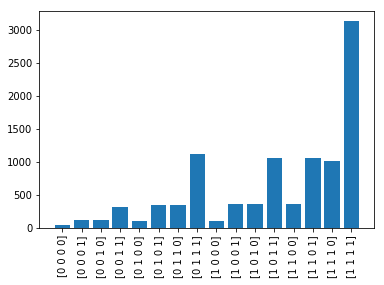

In [8]:
expériences = [ ]
for compteur in range(10000):
    expériences.append(str(np.random.choice([0,1],4,p=[0.25,0.75])))
Graphique(expériences)

Maintenant, au lieu de regarder les branches choisies par la simulation, regardons le nombre de grains qui germent dans chaque expérience et conservons le tout pour le représenter.

Comment modifier le programme précédent pour le faire ?

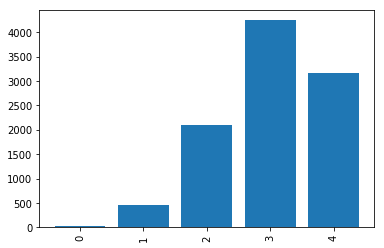

In [9]:
expériences = [ ]
for compteur in range(10000):
    expériences.append(sum(np.random.choice([0,1],4,p=[0.25,0.75])))
Graphique(expériences)

Expliquer comment on peut prédire la hauteur des bâtons à partir de l’arbre.

# Troisième Partie : Avec des grands échantillons
## Exercice 4
Testons maintenant 100 grains pour connaître plus facilement le pouvoir germinatif.

Simulons 10000 expériences et affichons la répartition des différents résultats pour des tests de 100 grains avec un pouvoir germinatif de 75%.

Écrire le programme correspondant et l’exécuter.

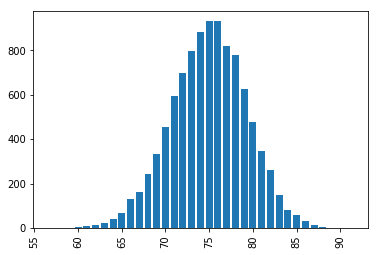

In [10]:
expériences = [ ]
for compteur in range(10000):
    expériences.append(sum(np.random.choice([0,1],100,p=[0.25,0.75])))
Graphique(expériences)

2. D’après le graphique obtenu, est-il possible qu’aucun grain ne germe ? Calculer la fréquence de cet événement à l’aide de la méthode trouvée à l’exercice précédent.
3. Est-il possible de n’avoir que 65 grains qui germent alors que le pouvoir germinatif est de 75 % ? Est-il possible d’avoir 85 grains qui germent alors que le pouvoir germinatif est de 75 % ?

Cherchons une formule simple pour trouver la variabilité des grains qui germent dans nos échantillons. Nous venons de constater que la fréquence de germination dans l’échantillon est de 75% plus ou moins 10%.

Imaginer une formule simple permettant d’obtenir 0,1 = 1/10 (soit 10%) à partir de la taille n=100 de l’échantillon.

## Exercice 5 : Intervalle de fluctuation
Soit s l’écart type des nombres de grains germés dans les échantillons de l’expérience.

1.	Améliorer le programme suivant pour colorier en vert, les nombres de grains germés compris dans l’intervalle $[75- s ; 75+s]$, en bleu ceux compris dans $[75- 2s ; 75+2s]$ mais pas dans $[75- s ; 75+s]$, en rouge ceux compris dans $[75- 3s ; 75+3s]$ mais pas dans $[75- 2s ; 75+2s]$ et en noir les autres.


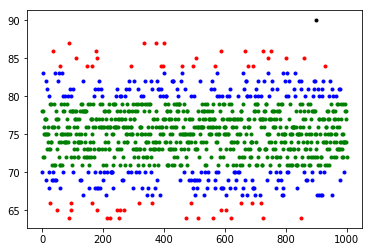

In [11]:
expériences = [ ]
for compteur in range(1000):
    expériences.append(sum(np.random.choice([0,1],100,p=[0.25,0.75])))
std = np.std(expériences) # calcule l’écart type
for compteur in range(len(expériences)):
    if abs(expériences[compteur]-75)<std:
        plt.plot(compteur,expériences[compteur],'g.')
    elif abs(expériences[compteur]-75)<2*std:
        plt.plot(compteur,expériences[compteur],'b.')
    elif abs(expériences[compteur]-75)<3*std:
        plt.plot(compteur,expériences[compteur],'r.')
    else:
        plt.plot(compteur,expériences[compteur],'k.')
plt.show()


2.	Est-il raisonnable de dire, qu’en général, les nombres de grains germés sont dans l’intervalle $[75- 2s ; 75+2s]$ ?
3.	Modifier le programme pour compter le nombre de points verts ou bleus. Quel part de l’expérience totale représentent-ils ?


In [12]:
CompteurVertBleu = 0
for compteur in range(len(expériences)):
    if abs(expériences[compteur]-75)<2*std:
        CompteurVertBleu = CompteurVertBleu + 1
print( CompteurVertBleu / len(expériences) )

0.944


La part des points verts ou bleus tourne autour de 95 %. Nous avons donc trouvé avec $[75- 2s ; 75+2s]$ un intervalle de fluctuation dans lequel on trouve le nombre de grains germés dans 95 % des échantillons. 

Que fait le programme suivant ? Comparer le résultat celui de la question précédente.


In [13]:
CompteurIntervalle = 0
for compteur in range(len(expériences)):
    if abs(expériences[compteur]/100-0.75)<0.1:
        CompteurIntervalle = CompteurIntervalle + 1
print( CompteurIntervalle / len(expériences) )

0.979


## Exercice 6 : vers une formule simplifiée de l’intervalle de fluctuation
Dans l’exercice précédent, nous avons trouvé, en généralisant, que si p est le pouvoir germinatif de nos grains et s l’écart type des échantillons, alors $[p-2s ;p+2s]$ est l’intervalle dans lequel vont fluctuer les fréquences des grains germés dans 95% des échantillons.

Mais pour connaître $s$, il faut prendre beaucoup d’échantillons. Un autre candidat pour être un intervalle de fluctuation semble être $[p-1\sqrt{n} ; p+1\sqrt{n}]$ dans lequel semble fluctuer les fréquences des grains germés dans plus de 95% des échantillons.

Essayons de vérifier le lien.

Exécuter le programme suivant ? Que fait-il ?


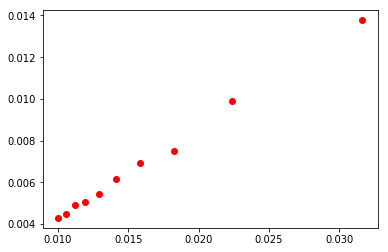

In [14]:
for n in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
    expériences = []
    for compteur in range(1000):
        expériences.append(sum(np.random.choice([0,1],n,p=[0.25,0.75]))/n)
    plt.plot(1/sqrt(n),np.std(expériences),'ro')
plt.show()

2.	Les points semblent alignés. Estimer l’équation de cette droite.
3.	En déduire que $\frac1{\sqrt{n}}$ est environ égal à $2s$
4.	En déduire que pour diviser la dispersion par $k$, on doit multiplier la taille de l’échantillon par $k^2$.
5.	Donner alors une formule d’un intervalle contenant approximativement 95% des pourcentages dans un échantillon de taille $n$.

## Conclusion finale

+ Combien de grains de blé doit-on prendre dans notre échantillon pour estimer le pouvoir germinatif du blé du sac à 1% près ?
+ Est-ce bien raisonnable ? 
+ Combien de grains à tester trouvez-vous raisonnable de tester ?
+ Quelle précision a-t-on alors ?
